Saving archive (1).zip to archive (1) (1).zip
Dataset Preview:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Missing Values:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


<Figure size 1200x600 with 0 Axes>

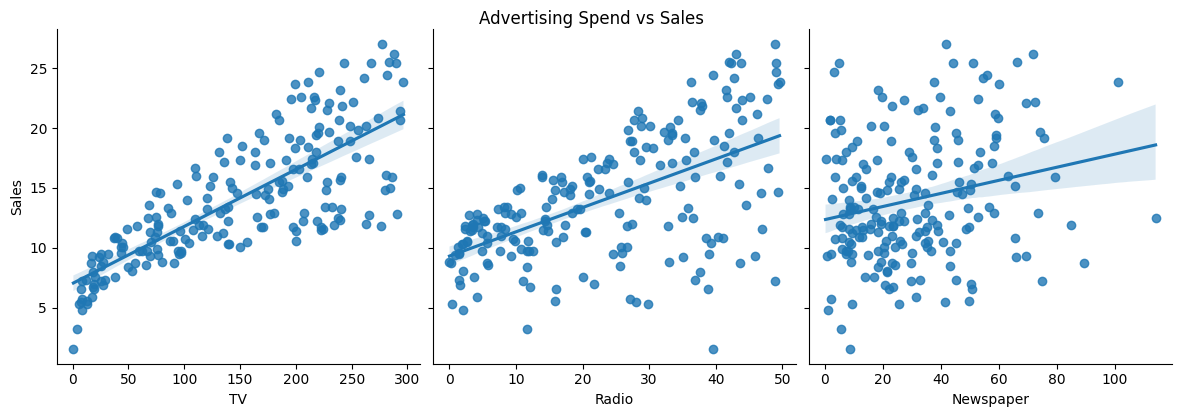

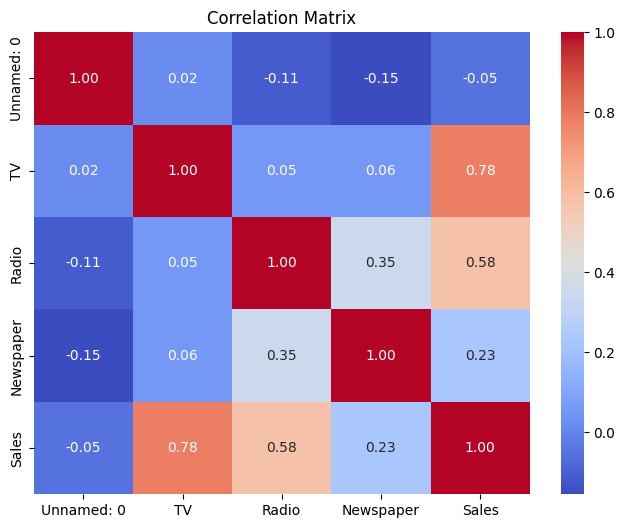


Model Performance:
Mean Squared Error: 3.17
R-squared Score: 0.90


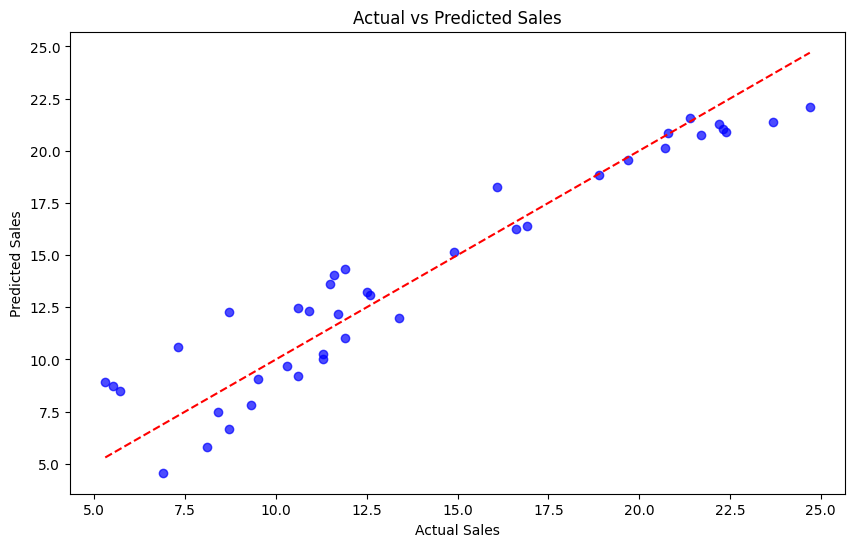


Model training and evaluation completed successfully!


In [3]:
# Sales Prediction using Machine Learning in Python.

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import files
uploaded = files.upload()

# Loading dataset
file_path = list(uploaded.keys())[0] # Get the name of the first uploaded file.
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Data Visualization
plt.figure(figsize=(12, 6))
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='reg', height=4)
plt.suptitle('Advertising Spend vs Sales', y=1.02)
plt.show()

# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Feature Selection and Target Variable
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
predictions = model.predict(X_test)

print("\nModel Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, predictions):.2f}")
print(f"R-squared Score: {r2_score(y_test, predictions):.2f}")

# Visualize Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# Save the model (optional)
import joblib
joblib.dump(model, 'sales_prediction_model.pkl')

print("\nModel training and evaluation completed successfully!")
